## 모델생성

- 사용할 분류모델 종류
    - Logistic Regression
    - Support Vector Machine (SVM)
    - Random Forest
    - Gradient Boosting Tree (GBT)-
    - AdaBoost
    - LightBoost
    - XGBoost
    - ExtraTreesClassifier

In [7]:
# load data
import pandas as pd
data=pd.read_csv('../data/preprocessed_data/weighted_data.csv', encoding='cp949', index_col=0)
target=pd.read_csv('../data/preprocessed_data/y_data.csv', encoding='cp949', index_col=0)

In [12]:
# import models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

models_li = [LogisticRegression(solver='saga'), SVC(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), ExtraTreesClassifier(), XGBClassifier()]

In [10]:
import numpy as np

In [14]:
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
data_ssc=ssc.fit_transform(data)

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)

score_total=list()
for i in range(10):
    temp_list=list()
    for model in models_li:
        result = cross_val_score(model,
                                 data_ssc,
                                 target[f'{i+1}일 뒤 종가'],
                                 cv=rskfold)
        print(str(model).split('(')[0])
        print(f'{i+1}일 뒤 종가 : {round(np.mean(result),3)} \n')
        temp_list.append(round(np.mean(result),3))
    score_total.append(temp_list)

LogisticRegression
1일 뒤 종가 : 0.48 

SVC
1일 뒤 종가 : 0.488 

RandomForestClassifier
1일 뒤 종가 : 0.475 

GradientBoostingClassifier
1일 뒤 종가 : 0.471 

AdaBoostClassifier
1일 뒤 종가 : 0.513 

ExtraTreesClassifier
1일 뒤 종가 : 0.469 

XGBClassifier
1일 뒤 종가 : 0.478 

LogisticRegression
2일 뒤 종가 : 0.476 

SVC
2일 뒤 종가 : 0.502 

RandomForestClassifier
2일 뒤 종가 : 0.475 

GradientBoostingClassifier
2일 뒤 종가 : 0.478 

AdaBoostClassifier
2일 뒤 종가 : 0.453 

ExtraTreesClassifier
2일 뒤 종가 : 0.48 

XGBClassifier
2일 뒤 종가 : 0.462 

LogisticRegression
3일 뒤 종가 : 0.477 

SVC
3일 뒤 종가 : 0.497 

RandomForestClassifier
3일 뒤 종가 : 0.496 

GradientBoostingClassifier
3일 뒤 종가 : 0.471 

AdaBoostClassifier
3일 뒤 종가 : 0.455 

ExtraTreesClassifier
3일 뒤 종가 : 0.485 

XGBClassifier
3일 뒤 종가 : 0.493 

LogisticRegression
4일 뒤 종가 : 0.477 

SVC
4일 뒤 종가 : 0.519 

RandomForestClassifier
4일 뒤 종가 : 0.525 

GradientBoostingClassifier
4일 뒤 종가 : 0.471 

AdaBoostClassifier
4일 뒤 종가 : 0.461 

ExtraTreesClassifier
4일 뒤 종가 : 0.511 

XGBClassifier
4일 뒤 종가 

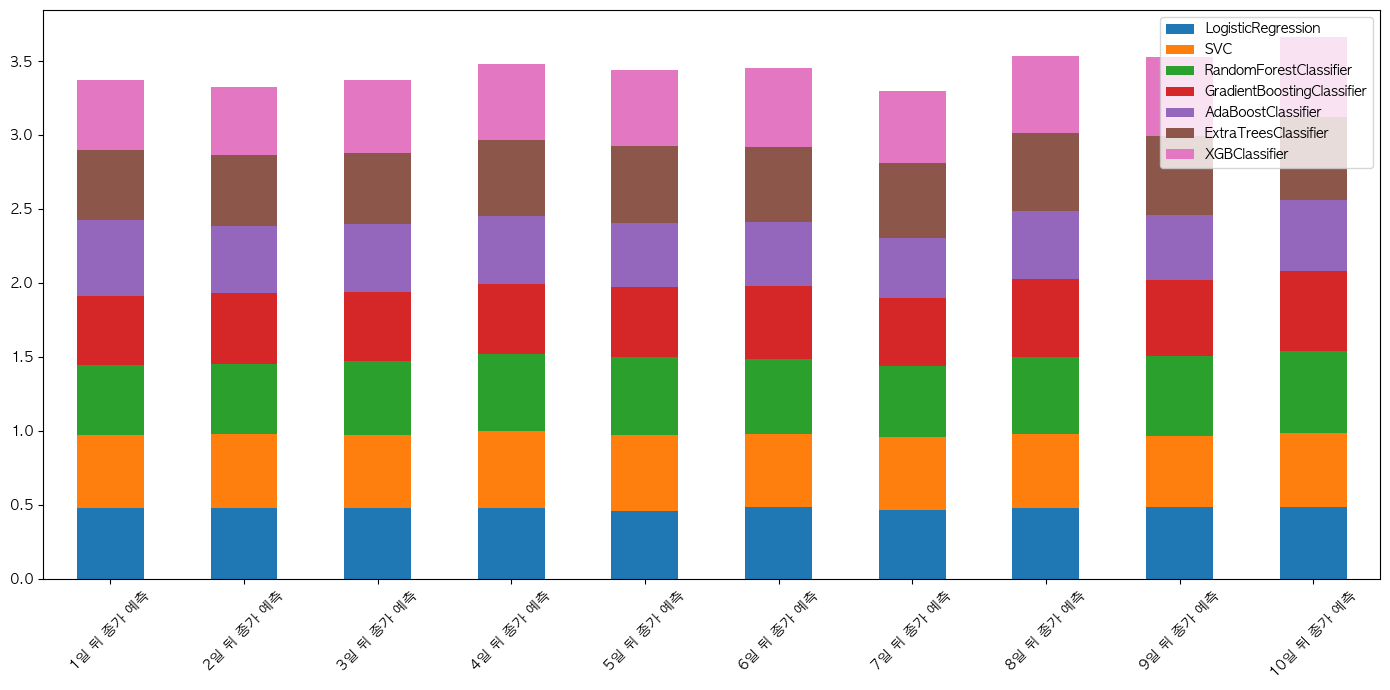

In [30]:
# plot 
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
df=pd.DataFrame(score_total,columns=[str(i).split('(')[0] for i in models_li],index=[f'{i}일 뒤 종가 예측' for i in range(1,11)])
df.plot(kind='bar',stacked=True,figsize=(14,7))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

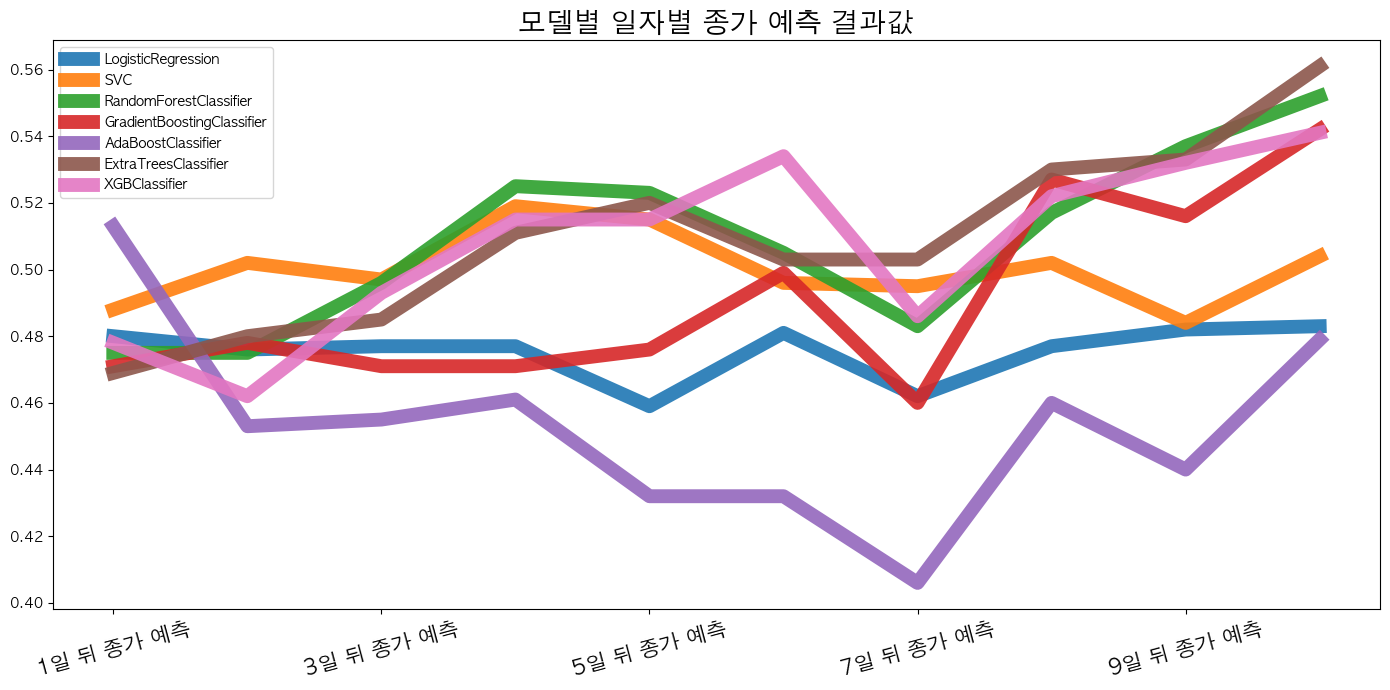

In [51]:
df.plot(figsize=(14,7),linewidth=10,alpha=0.9,linestyle='-')
plt.xticks(rotation=15,fontsize=15)
plt.title('모델별 일자별 종가 예측 결과값',fontsize=20)
plt.legend(fontsize=10,loc=2)
plt.tight_layout()
plt.show()